In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import random
np.random.seed(42)
from scipy import stats
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from collections import Counter

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, plot_confusion_matrix, confusion_matrix, plot_roc_curve

In [ ]:
#reading the training and validation data into dataframe
data_train = pd.read_csv("Data Science HW design model.csv")
data_val = pd.read_csv("Data Science HW design val.csv")

In [ ]:
#checking the number of instances and basic details about the data, like the null values and the feature data-type
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94000 entries, 0 to 93999
Data columns (total 31 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   A1       94000 non-null  float64
 1   A2       94000 non-null  float64
 2   A3       94000 non-null  float64
 3   A4       94000 non-null  float64
 4   A5       94000 non-null  float64
 5   A6       94000 non-null  float64
 6   A7       94000 non-null  float64
 7   A8       94000 non-null  float64
 8   A9       94000 non-null  float64
 9   A10      94000 non-null  float64
 10  A11      94000 non-null  float64
 11  A12      94000 non-null  float64
 12  A13      94000 non-null  float64
 13  A14      94000 non-null  float64
 14  A15      94000 non-null  float64
 15  A16      94000 non-null  float64
 16  A17      94000 non-null  float64
 17  A18      94000 non-null  float64
 18  A19      94000 non-null  float64
 19  A20      94000 non-null  float64
 20  A21      94000 non-null  int64  
 21  A22      940

In [ ]:
#for the validation dataset
data_val.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11500 entries, 0 to 11499
Data columns (total 31 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   A1       11500 non-null  float64
 1   A2       11500 non-null  float64
 2   A3       11500 non-null  float64
 3   A4       11500 non-null  float64
 4   A5       11500 non-null  float64
 5   A6       11500 non-null  float64
 6   A7       11500 non-null  float64
 7   A8       11500 non-null  float64
 8   A9       11500 non-null  float64
 9   A10      11500 non-null  float64
 10  A11      11500 non-null  float64
 11  A12      11500 non-null  float64
 12  A13      11500 non-null  float64
 13  A14      11500 non-null  float64
 14  A15      11500 non-null  float64
 15  A16      11500 non-null  float64
 16  A17      11500 non-null  float64
 17  A18      11500 non-null  float64
 18  A19      11500 non-null  float64
 19  A20      11500 non-null  float64
 20  A21      11500 non-null  int64  
 21  A22      115

##Details:

- We have 94,000 data instances in training dataset with 30 attributes/features and default as the labels 

- We have 11,500 data instances in validation dataset with similar columns and defualt as labels.

- There are no null values present in each column as we can see from the information.

In [ ]:
#seeing the data description to figure out the distribuition of the data and if there are any outliers present
data_train.describe()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16,A17,A18,A19,A20,A21,A22,A23,A24,A25,A26,A27,A28,A29,A30,default
count,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,9.400000e+04,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000
mean,12.134211,83.838361,7319.620881,13449.501569,33.507640,36.983300,1.518232,124.108845,1.697824,1.407075,82.561804,11.364377,20.453328,55.172549,1.036205e+05,0.282347,4113.993992,0.190747,0.112162,1.545606,53.707096,0.074435,0.008550,0.013537,0.133531,290.756534,357.976444,103.482568,28.847016,38.509910,0.042553
std,6.587858,8.672843,2652.539364,8197.452662,11.906865,14.209314,1.007398,33.130292,0.776810,0.652138,10.740732,2.767727,11.671429,12.015331,5.954836e+04,0.252047,1300.549863,0.181137,0.142458,0.627285,56.617973,0.138356,0.020052,0.029078,0.156658,471.958770,597.594147,136.248095,62.759062,90.882963,0.201849
min,0.000000,20.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.460000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-0.010000,-0.020000,-0.020000,0.000000,-751.260000,-405.370000,-616.230000,-490.160000,-719.720000,0.000000
25%,7.670000,79.000000,5618.627500,8700.000000,26.880000,28.780000,0.820000,103.027500,1.272000,1.000000,77.270000,9.640000,13.600000,49.070000,6.562992e+04,0.130000,3422.220000,0.080000,0.000000,1.140000,19.000000,0.010000,0.000000,0.000000,0.060000,0.000000,0.000000,14.970000,0.000000,0.000000,0.000000
50%,12.020000,84.360000,7285.590000,11862.650000,32.770000,35.940000,1.420000,127.240000,1.667000,1.399000,83.340000,11.330000,19.110000,55.190000,9.074253e+04,0.250000,4050.000000,0.170000,0.090000,1.450000,39.000000,0.030000,0.000000,0.010000,0.090000,115.140000,102.265000,59.350000,10.500000,0.000000,0.000000
75%,16.080000,89.670000,8780.870000,15896.575000,39.100000,43.830000,2.020000,143.100000,2.064000,1.714000,89.010000,12.790000,25.170000,61.810000,1.282739e+05,0.360000,4668.192500,0.250000,0.140000,1.860000,69.000000,0.080000,0.010000,0.010000,0.140000,380.142500,485.880000,140.952500,34.860000,49.862500,0.000000
max,62.710000,100.000000,26333.500000,170300.000000,146.000000,146.000000,18.670000,524.000000,44.000000,44.000000,100.000000,35.430000,237.000000,146.000000,1.079286e+06,7.000000,20000.000000,3.250000,5.000000,8.100000,1902.000000,5.300000,0.700000,1.690000,4.080000,15288.660000,19503.760000,3265.980000,6561.930000,13487.000000,1.000000


Total instances with 0 labels are 90000, which is 95.74468085106383% percetange from total data.
Total instances with 1 labels are 4000, which is 4.25531914893617% percetange from total data.


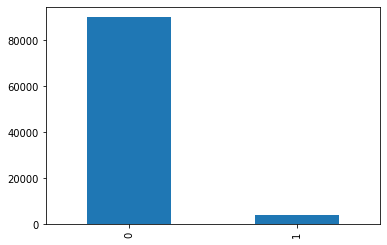

In [ ]:
#plotting the count of 1 and 0s labels to check the total instances in each class
label_count = data_train['default']
label_count.value_counts().plot.bar()
label_0 = label_count[lambda x: x == 0].count()
label_1 = label_count[lambda x : x ==1].count()
print(f"Total instances with 0 labels are {label_0}, which is {(label_0/(label_0+label_1))*100}% percetange from total data.")
print(f"Total instances with 1 labels are {label_1}, which is {(label_1/(label_0+label_1))*100}% percetange from total data.")

In [ ]:
#same again for the validation data to check if the it has the similar distibuition
data_val.describe()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16,A17,A18,A19,A20,A21,A22,A23,A24,A25,A26,A27,A28,A29,A30,default
count,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000
mean,12.912370,82.996250,7121.193469,12969.915071,34.567032,38.290894,1.608435,121.486797,1.642194,1.363613,81.784661,11.171147,21.201802,55.923154,100743.066789,0.301730,4065.549412,0.204250,0.120132,1.586100,55.041043,0.077656,0.009178,0.014158,0.135987,289.664904,353.898283,102.034951,27.673394,40.731303,0.130435
std,7.035279,9.017252,2673.425470,7960.762380,12.484591,15.023454,1.042281,33.738120,0.732355,0.598877,11.042182,2.797509,12.040949,12.275541,57914.463430,0.272532,1302.275528,0.194529,0.155909,0.648806,178.533732,0.153989,0.024546,0.030284,0.158443,520.792137,584.500018,131.415911,53.560611,156.780339,0.336796
min,0.000000,16.710000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.120000,0.000000,0.000000,1708.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-0.010000,-0.010000,0.000000,-559.990000,-140.940000,-187.120000,-447.680000,-223.890000,0.000000
25%,8.210000,77.947500,5318.782500,8294.440000,27.477500,29.447500,0.890000,98.822500,1.200000,1.000000,76.247500,9.340000,14.090000,49.530000,63679.625000,0.140000,3375.000000,0.080000,0.000000,1.160000,19.000000,0.010000,0.000000,0.000000,0.060000,0.000000,0.000000,14.180000,0.000000,0.000000,0.000000
50%,12.550000,83.580000,7129.690000,11471.620000,33.360000,36.690000,1.500000,124.890000,1.632000,1.374000,82.775000,11.150000,19.670000,55.880000,88442.005000,0.270000,4016.275000,0.180000,0.100000,1.480000,39.000000,0.040000,0.000000,0.010000,0.090000,111.090000,104.725000,60.015000,10.040000,0.000000,0.000000
75%,17.000000,89.150000,8635.810000,15465.432500,40.640000,45.800000,2.130000,141.450000,2.000000,1.667000,88.560000,12.640000,26.272500,62.835000,125844.525000,0.380000,4650.000000,0.260000,0.150000,1.920000,69.000000,0.080000,0.010000,0.010000,0.140000,377.125000,482.075000,139.065000,34.030000,49.945000,0.000000
max,100.000000,100.000000,26862.500000,132787.500000,128.000000,128.000000,11.080000,319.670000,10.000000,6.000000,100.000000,32.150000,160.000000,125.640000,600283.270000,4.000000,17333.330000,2.800000,3.000000,6.270000,18288.000000,4.920000,0.680000,0.770000,2.340000,26625.900000,9094.610000,1682.140000,1312.530000,14423.670000,1.000000


Total instances with 0 labels are 10000, which is 86.95652173913044% percetange from total data.
Total instances with 1 labels are 1500, which is 13.043478260869565% percetange from total data.


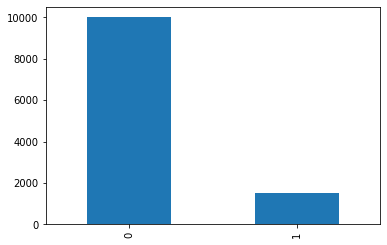

In [ ]:
#plotting the count of 1 and 0s labels
label_count = data_val['default']
label_count.value_counts().plot.bar()
label_0 = label_count[lambda x: x == 0].count()
label_1 = label_count[lambda x : x ==1].count()
print(f"Total instances with 0 labels are {label_0}, which is {(label_0/(label_0+label_1))*100}% percetange from total data.")
print(f"Total instances with 1 labels are {label_1}, which is {(label_1/(label_0+label_1))*100}% percetange from total data.")

In [ ]:
#getting the feature names from the column to plot the graph
labels = data_train.columns.values[:-1]
print(labels)


['A1' 'A2' 'A3' 'A4' 'A5' 'A6' 'A7' 'A8' 'A9' 'A10' 'A11' 'A12' 'A13'
 'A14' 'A15' 'A16' 'A17' 'A18' 'A19' 'A20' 'A21' 'A22' 'A23' 'A24' 'A25'
 'A26' 'A27' 'A28' 'A29' 'A30']


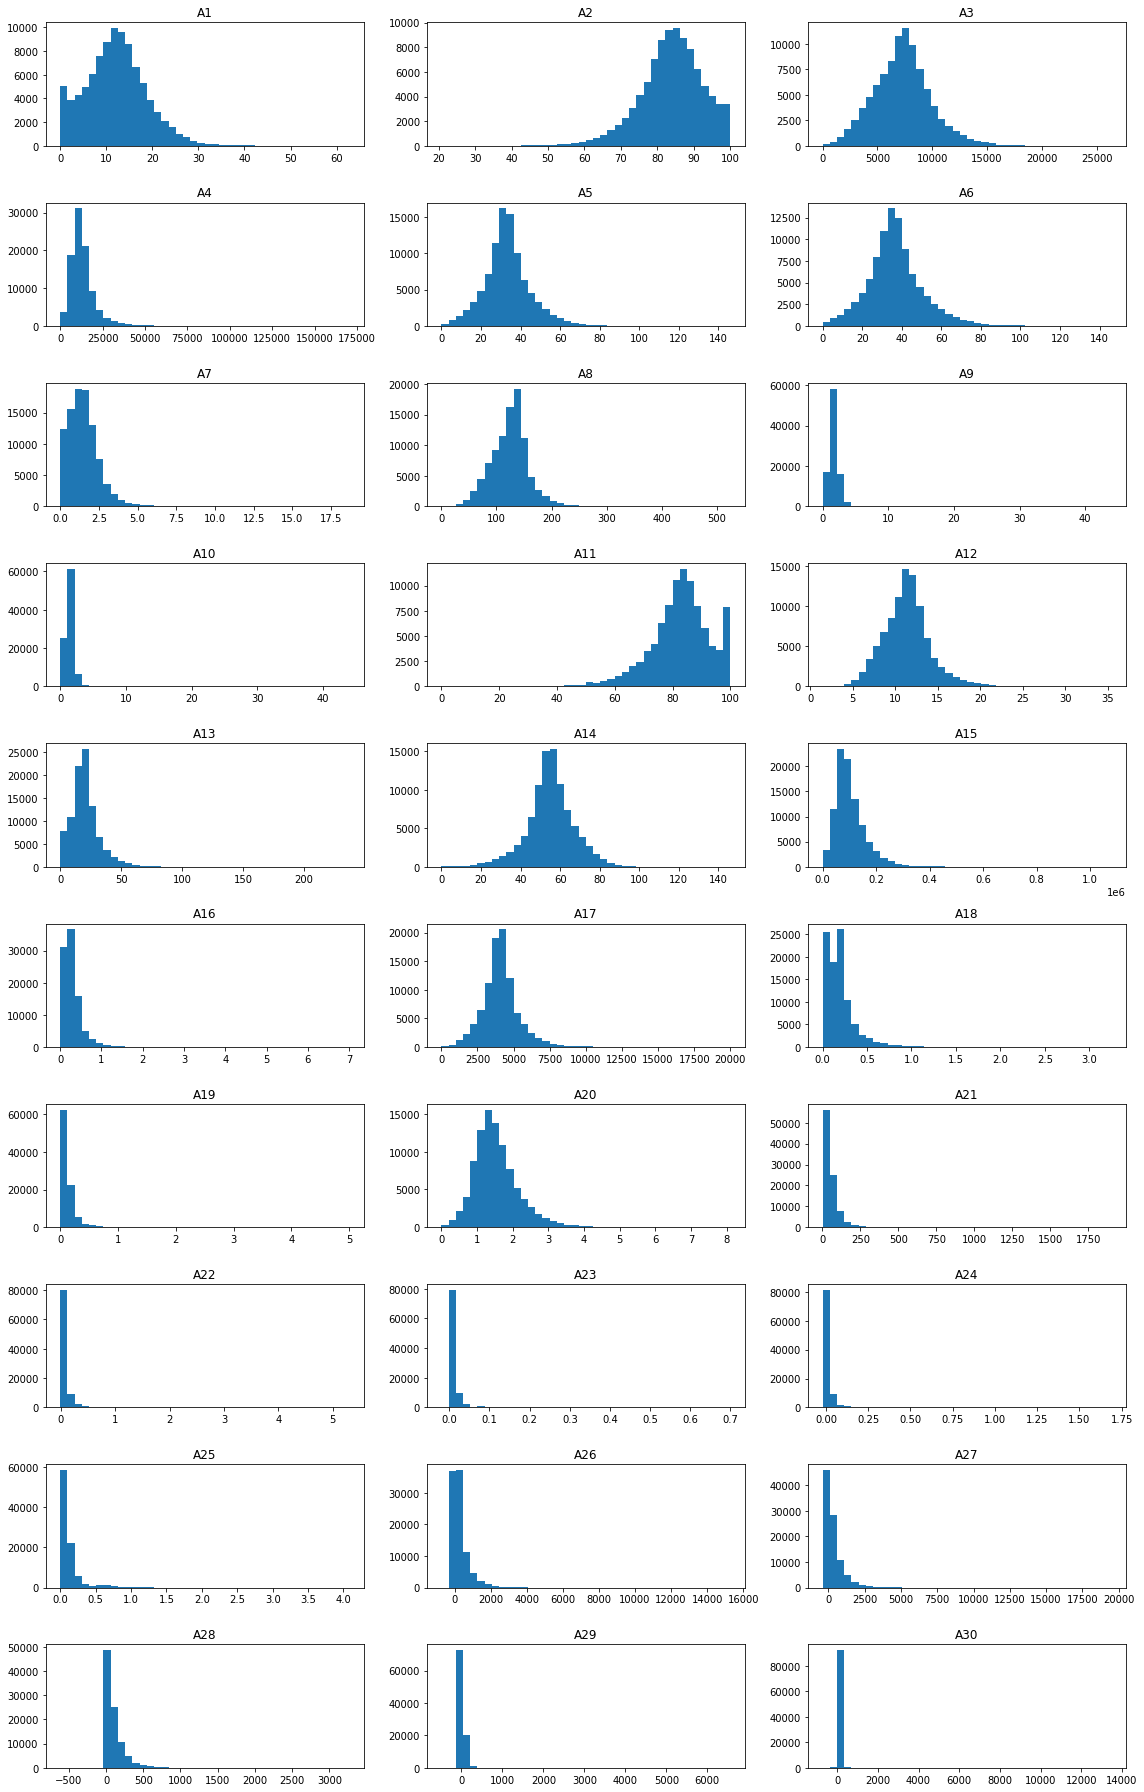

In [ ]:
#plotting the features to understand the trend in training dataset for each features

fig, axe = plt.subplots(nrows=10, ncols=3, figsize=(16,25))
axe = axe.flatten()
for i, ax in enumerate(axe):
    x = np.array(data_train[labels[i]])
    ax.hist(x,bins=40)
    ax.set_title(labels[i])
    fig.tight_layout()

##Observations

- Here, as we can see the dataset is highly imbalanced. So to make a good model and make predictions we will have to try different sampling techniques.

- Another thing that we saw in the **description** and the **distribution** graphs of the data was that all features are from different distibuition and had different ranges. 

- When we are using logistic regression algorithm, we first need to scale the data for faster convergence, but again if scale the data as we are observing some outliers here, the scaling would be useless. The outliers are present in both training and testing data.


- Also, in the description as we can see the 25% and 75% marks(Q1 and Q3) are low but the maximum values are significantly larger(outliers in the features) for some features. We might want to address that. 

##What can we do then?

- Firstly, we can use different feature selection methods, like corealtion betweeen features and then p-value test to select features.

- Now, to address the outliers in each feature, we can use the interquartile transformations. But again from the graphs as we can see not all features have normal distribution. Some of them are skewed. 

- Skew data is not good if we want to preserve the information while using the interquartile clipping.

- So the steps we could take are,

  1. First, transfrom the skewed features to a normal distribuition using log transformations. 
  2. Then, use interquartile ranges to remove the outliers.


## Removing outliers? Data loss??

- To deal with this problem, we can also replace outliers with some data imputation methods. Like mean or median imputation. Or we could also use knn to predict the most nearest value to be imputed. 
(For such classification task would it be an overkill?? Depends, right?)


But here again first we want to just keep the things simple so we will worry about the data loss aftwerwards. For now, we will just focus on the outliers instead of the distribuition of each feature.





In [ ]:
#Creating a copy
data_train_copy = data_train.copy()
df_create = data_val.copy()

In [ ]:
#taking lables 

data_clip = data_train.copy()
data_clip_labels = data_clip['default'].values
data_clip = data_clip.drop(['default'], axis = 1)

In [ ]:
#we also have to clip the testing data as well, to make sure that they both are from similar distribuition

data_val_clip = data_val.copy()
valclip_labels = data_val['default'].values
data_val_clip = data_val_clip.drop(['default'], axis = 1)

#Workflow - Modelling

- Now, for modelling we will first need a baseline model to comapre our results with.

###Baseline model:
 - We will use the original dataset and directly use Standard Scaler to scale the data, balance the dataset and then use logistic regression on that.

###Our improved models:
- First we will use the dataset where we have kept the outliers, removed the highly correlated features manually, selected the features based on p-values and then applied the algorithm on the dataset based on different sampling techniques.

- Second would be to remove the outliers and again try the algorithms

##Algorithms:

1. Logistic regression.
2. SVC


Trying the basline model

In [ ]:
#scaling the features for the training
scale_baseline = StandardScaler()
train_scale = scale_baseline.fit_transform(data_clip)

val_baseline = scale_baseline.transform(data_val_clip)

In [ ]:
#
baseline = LogisticRegression(max_iter=100)
baseline.fit(train_scale, data_clip_labels)

yhat = baseline.predict(val_baseline)

print("Training Accuracy",baseline.score(train_scale, data_clip_labels))
print("Testing Accuracy", baseline.score(val_baseline, valclip_labels))

conf_  = confusion_matrix(y_true=valclip_labels, y_pred=yhat)

print("Confusion Matrix : ")
print("==="*8)
print(conf_)
print("==="*8)
print("F1score is : ", f1_score(valclip_labels, yhat))


Training Accuracy 0.9570425531914893
Testing Accuracy 0.872
Confusion Matrix : 
[[9988   12]
 [1460   40]]
F1score is :  0.05154639175257733


- As we can see in the baseline model, if we run without any feature engineering and just use the logistic regression directly, accuracy is really high.

- But it is misleading, since from the confusion matrix we can see that our model is only classifying majority class and naturally it is leading to high accuracy but F1 score is almost none. = 5% which is really bad. 

- Thus, our basline model does not work. and now we will try to improve the results using new feature engineering techniques.

In [ ]:
#Finding out the highly correlated features and removing them

#looking at the correlation of the features
corr = data_clip.corr()

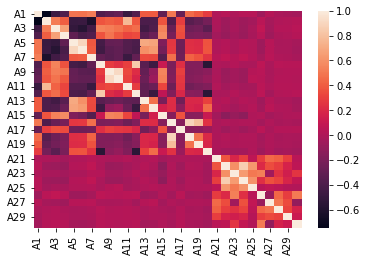

In [ ]:
#plotting the highly correlated features
import seaborn as sns

sns.heatmap(corr)

In [ ]:
#function to figure out the columns and rmoving them
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = data_clip.columns[columns]
data_selected = data_clip[selected_columns]

In [ ]:
#looking at the columns after the highly correlated columns are dropped
data_selected

,A1,A2,A3,A4,A5,A7,A8,A9,A11,A12,A13,A14,A15,A16,A17,A18,A19,A20,A21,A22,A23,A24,A25,A26,A27,A28,A29,A30
0,10.69,86.10,8920.16,19912.85,30.42,1.18,145.41,2.236,84.29,13.46,16.01,52.18,123101.84,0.23,4305.85,0.15,0.09,1.09,10,0.01,0.01,0.01,0.13,0.00,0.00,0.00,0.00,0.00
1,28.50,65.19,6564.00,6716.67,32.50,2.74,91.11,1.000,59.80,8.18,29.33,63.55,34275.73,0.80,3616.67,0.78,0.14,1.67,35,0.06,0.01,0.00,0.09,285.80,0.00,16.44,1.98,42.26
2,24.87,73.79,4285.47,6463.75,40.50,2.84,93.90,2.400,77.17,10.25,39.92,61.95,84841.79,0.78,2301.54,0.62,0.15,2.80,31,0.08,0.02,0.02,0.44,494.62,135.41,127.45,46.00,14.92
3,13.64,85.82,6887.56,9244.44,49.56,0.36,171.45,1.875,95.88,15.38,49.80,67.22,145261.11,0.09,3419.60,0.09,0.00,1.00,29,0.03,0.01,0.00,0.05,1015.19,0.00,210.63,92.58,0.00
4,4.50,95.92,8746.50,19987.50,32.75,0.92,153.25,2.000,94.55,11.87,17.43,50.70,120522.80,0.17,3828.57,0.08,0.00,2.69,22,0.01,0.00,0.00,0.04,0.00,106.41,79.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
93995,8.18,92.55,4305.29,5420.00,30.60,0.73,76.67,0.000,100.00,6.82,35.50,30.60,16063.00,0.36,3050.00,0.22,0.11,2.25,28,0.20,0.04,0.04,0.04,0.00,0.00,0.00,0.00,0.00
93996,13.22,84.14,7614.67,14460.69,32.74,1.85,117.22,2.287,83.49,10.78,18.81,55.80,106855.62,0.27,4041.31,0.18,0.10,1.88,22,0.07,0.01,0.01,0.28,221.97,0.00,9.93,15.87,63.74
93997,14.91,85.36,4628.71,6070.00,31.30,2.09,135.70,3.000,90.78,11.84,10.00,47.82,23114.64,0.73,3078.57,0.40,0.44,1.82,97,0.44,0.06,0.04,0.23,468.81,265.85,44.89,12.76,52.39
93998,10.77,85.94,8540.43,19452.79,29.92,1.24,147.39,2.013,84.18,12.98,14.86,49.22,102753.17,0.27,4769.85,0.20,0.09,1.29,151,0.13,0.01,0.02,0.10,83.90,1034.35,281.25,53.10,0.00


In [ ]:
import statsmodels.api as sm

In [ ]:
#creating the new list with new column names 
labels_select = data_selected.columns.values

In [ ]:
#converting it to a list for removing an element
print(labels_select)
labels_select = list(labels_select)

['A1' 'A2' 'A3' 'A4' 'A5' 'A7' 'A8' 'A9' 'A11' 'A12' 'A13' 'A14' 'A15'
 'A16' 'A17' 'A18' 'A19' 'A20' 'A21' 'A22' 'A23' 'A24' 'A25' 'A26' 'A27'
 'A28' 'A29' 'A30']


In [ ]:
#function to find the features with high p-vals

def show_stats():
  x = data_selected[labels_select]
  results = sm.OLS(data_clip_labels, x).fit()
  print(results.summary())


In [ ]:
from sklearn import datasets
import statsmodels.api as sm
from scipy import stats

# Load data
data = datasets.load_iris()
X = data.data
X = sm.add_constant(X)
y = data.target

# Fit the logistic regression
est = sm.OLS(y, X)
res = est.fit()

n_datapoints = X.shape[0]
dim = X.shape[1]
df = n_datapoints - dim

for t, p in zip(res.tvalues, res.pvalues):
    # Print t- and p-values returned by statsmodels
    print("Fit t-value=%.2g" % t)
    print("Fit p-value=%.10g" % p)

    # Compute p-value from the returned t-values
    p_manual = stats.t.sf(abs(t), df=res.df_resid)*2
    print("t-test Calculated p-value=%.10g" % p_manual)

    print()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Fit t-value=0.91
Fit p-value=0.3641020792
t-test Calculated p-value=0.3641020792

Fit t-value=-1.9
Fit p-value=0.05416918171
t-test Calculated p-value=0.05416918171

Fit t-value=-0.67
Fit p-value=0.5029869494
t-test Calculated p-value=0.5029869494

Fit t-value=4
Fit p-value=9.25521505e-05
t-test Calculated p-value=9.25521505e-05

Fit t-value=6.5
Fit p-value=1.564180424e-09
t-test Calculated p-value=1.564180424e-09



In [ ]:
show_stats()

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.105
Model:                            OLS   Adj. R-squared (uncentered):              0.105
Method:                 Least Squares   F-statistic:                              393.6
Date:                Tue, 05 Oct 2021   Prob (F-statistic):                        0.00
Time:                        16:38:17   Log-Likelihood:                          20211.
No. Observations:               94000   AIC:                                 -4.037e+04
Df Residuals:                   93972   BIC:                                 -4.010e+04
Df Model:                          28                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
#remove the features that are having p > 0.05
#i have recursively removed and checked the p-vals to decide the columns to be removed
labels_select.remove('A23')
labels_select.remove('A29')
labels_select.remove('A30')
labels_select.remove('A16')
labels_select.remove('A14')
labels_select.remove('A28')
labels_select.remove('A3')
labels_select.remove('A11')
labels_select.remove('A22')


In [ ]:
show_stats()

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.105
Model:                            OLS   Adj. R-squared (uncentered):              0.105
Method:                 Least Squares   F-statistic:                              579.4
Date:                Tue, 05 Oct 2021   Prob (F-statistic):                        0.00
Time:                        16:38:18   Log-Likelihood:                          20205.
No. Observations:               94000   AIC:                                 -4.037e+04
Df Residuals:                   93981   BIC:                                 -4.019e+04
Df Model:                          19                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [ ]:
#get the training and the testing data with reduced features
x_train = data_clip[labels_select]
x_test = data_val[labels_select]

In [ ]:
#looking at the distribuition now
x_train.describe()

,A1,A2,A4,A5,A7,A8,A9,A12,A13,A15,A17,A18,A19,A20,A21,A24,A25,A26,A27
count,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,9.400000e+04,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000,94000.000000
mean,12.134211,83.838361,13449.501569,33.507640,1.518232,124.108845,1.697824,11.364377,20.453328,1.036205e+05,4113.993992,0.190747,0.112162,1.545606,53.707096,0.013537,0.133531,290.756534,357.976444
std,6.587858,8.672843,8197.452662,11.906865,1.007398,33.130292,0.776810,2.767727,11.671429,5.954836e+04,1300.549863,0.181137,0.142458,0.627285,56.617973,0.029078,0.156658,471.958770,597.594147
min,0.000000,20.750000,0.000000,0.000000,0.000000,0.000000,0.000000,1.460000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.000000,-0.020000,0.000000,-751.260000,-405.370000
25%,7.670000,79.000000,8700.000000,26.880000,0.820000,103.027500,1.272000,9.640000,13.600000,6.562992e+04,3422.220000,0.080000,0.000000,1.140000,19.000000,0.000000,0.060000,0.000000,0.000000
50%,12.020000,84.360000,11862.650000,32.770000,1.420000,127.240000,1.667000,11.330000,19.110000,9.074253e+04,4050.000000,0.170000,0.090000,1.450000,39.000000,0.010000,0.090000,115.140000,102.265000
75%,16.080000,89.670000,15896.575000,39.100000,2.020000,143.100000,2.064000,12.790000,25.170000,1.282739e+05,4668.192500,0.250000,0.140000,1.860000,69.000000,0.010000,0.140000,380.142500,485.880000
max,62.710000,100.000000,170300.000000,146.000000,18.670000,524.000000,44.000000,35.430000,237.000000,1.079286e+06,20000.000000,3.250000,5.000000,8.100000,1902.000000,1.690000,4.080000,15288.660000,19503.760000


As we can see there are still outliers in each features. Thus, we still cannot standardise the features yet.

###Modeling

- Here we will try to downsample the majority class, so the labels have 50-50 ratio.

- We will also use hybrid approach where, the the ratio will be somewhere around 30-70%.

Note that, for logistic regression we just need the amount of data that can help the model better identigfy the decision boundaries.

In [ ]:
#counting the initial points
print(Counter(data_clip_labels))

#Sampling the data to 50-50 ratio
undersample50 = RandomUnderSampler(sampling_strategy='majority', random_state=42)
X50_clip, y50_clip = undersample50.fit_resample(x_train, data_clip_labels)
print(Counter(y50_clip))


#hybrid approach of down and synthetic upsampling
undersample_ratio = RandomUnderSampler(sampling_strategy='majority', random_state=42, ratio=0.3)
X_ratioclip, y_ratioclip = undersample_ratio.fit_resample(x_train, data_clip_labels)
print(Counter(y_ratioclip))

oversample = SMOTE(random_state=42, ratio=0.4)
X_ratioclip, y_ratioclip = oversample.fit_resample(X_ratioclip, y_ratioclip)
print(Counter(y_ratioclip))

Counter({0: 90000, 1: 4000})
Counter({0: 4000, 1: 4000})
Counter({0: 13333, 1: 4000})
Counter({0: 13333, 1: 5333})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
## scaling traing and testing data

scaler_clip = StandardScaler()
scaled_clip = scaler_clip.fit_transform(X50_clip)

val_scaled = scaler_clip.transform(x_test)

In [ ]:
##Logistic regressor for 

clip_regressor = LogisticRegression(max_iter=500)
clip_regressor.fit(scaled_clip, y50_clip)
ypred_clip = clip_regressor.predict(val_scaled)


Validation set accuracy is 0.7382608695652174
Other evaluation metrics for val dataset:
[[7375 2625]
 [ 385 1115]]
Precision: 0.298
Recall: 0.743
F1 Score: 0.426


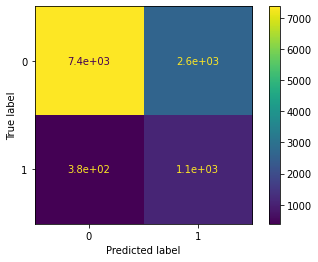

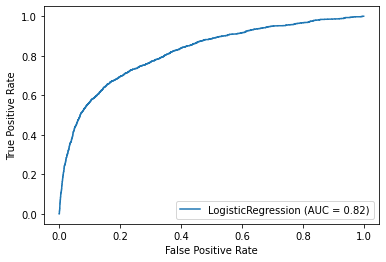

In [ ]:
#printing the accuracies 
print(f"Validation set accuracy is {clip_regressor.score(val_scaled, valclip_labels)}")

conf_matrix = confusion_matrix(y_true=valclip_labels, y_pred=ypred_clip)
print("====="*30)
print("Other evaluation metrics for val dataset:")
print(conf_matrix)
plot_confusion_matrix(clip_regressor, val_scaled, valclip_labels)
plot_roc_curve(clip_regressor, val_scaled, valclip_labels)

print('Precision: %.3f' % precision_score(valclip_labels, ypred_clip))
print('Recall: %.3f' % recall_score(valclip_labels, ypred_clip))
print('F1 Score: %.3f' % f1_score(valclip_labels, ypred_clip))

## Model for hybrid sampling techniques


In [ ]:
#scaling the features for hybrid
scalerratio_clip = StandardScaler()
scaled_ratio_clip = scalerratio_clip.fit_transform(X_ratioclip)

valratio_scaled = scalerratio_clip.transform(x_test)

In [ ]:
#model for hybrid sampling (SMOTE technique for oversampling)
clipratio_regressor = LogisticRegression(max_iter=500)
clipratio_regressor.fit(scaled_ratio_clip, y_ratioclip)
ypred_clip_ratio = clipratio_regressor.predict(valratio_scaled)

Validation set accuracy is 0.8696521739130435
Other evaluation metrics for val dataset:
[[9218  782]
 [ 717  783]]
Precision: 0.500
Recall: 0.522
F1 Score: 0.511


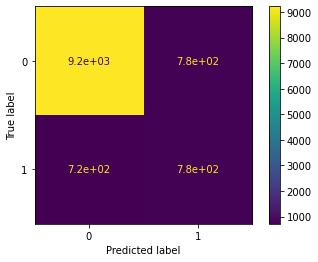

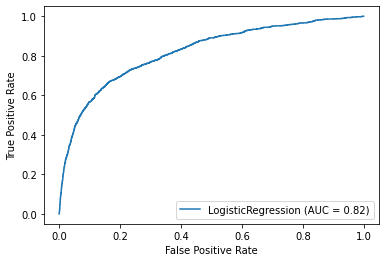

In [ ]:
print(f"Validation set accuracy is {clipratio_regressor.score(valratio_scaled, valclip_labels)}")

conf_matrix = confusion_matrix(y_true=valclip_labels, y_pred=ypred_clip_ratio)

print("====="*30)
print("Other evaluation metrics for val dataset:")
print(conf_matrix)
plot_confusion_matrix(clipratio_regressor, valratio_scaled, valclip_labels)
plot_roc_curve(clipratio_regressor, valratio_scaled, valclip_labels)

print('Precision: %.3f' % precision_score(valclip_labels, ypred_clip_ratio))
print('Recall: %.3f' % recall_score(valclip_labels, ypred_clip_ratio))
print('F1 Score: %.3f' % f1_score(valclip_labels, ypred_clip_ratio))

## Conclusion ??

- Hybrid sampling works better.

##Now let us try to remove those data points instead.

In [ ]:
#now, for removing outliers we see how many instances are there

def detect_out(df, feature):
  Q1 = df[feature].quantile(0.1)
  Q3 = df[feature].quantile(0.9)
  IQR = Q3- Q1

  low_bound = Q1 - 1.5*IQR
  up_bound = Q3 + 1.5*IQR

  ls = df.index[(df[feature] < low_bound) |(df[feature] > up_bound) ]

  return ls

In [ ]:
#Detecting the outliers using the function
list_index = []

for i in labels_select:
  list_index.extend(detect_out(x_train, i))

In [ ]:
class_labels = data_clip_labels

In [ ]:
#Counting the minority class instances to figure out the total ratio from the outliers

list_index = set(list_index)
majority_list = []
count1_label = 0
for i in list_index:
  if class_labels[i] == 1:
    count1_label += 1
  else:
    majority_list.append(i)


In [ ]:
print("Total instances that can be counted as outliers", len(list_index))
print("Total instances that are outloiers and are from minority class are ", count1_label)
print("Total percentage of those from the total amount of outliers is ",(count1_label)/len(list_index)*100)

Total instances that can be counted as outliers 10707
Total instances that are outloiers and are from minority class are  683
Total percentage of those from the total amount of outliers is  6.379004389651629


In [ ]:
#creating a dataframe after dropping all the outliers

list_index = list(list_index)
index_points = x_train.index[list_index]
x_train['default'] = class_labels
data_dropped = x_train.drop(index_points)
y_train = data_dropped['default'].values
data_dropped = data_dropped.drop(['default'],axis = 1)
print(data_dropped)
print(len(y_train))


          A1     A2        A4     A5    A7  ...  A21   A24   A25      A26      A27
0      10.69  86.10  19912.85  30.42  1.18  ...   10  0.01  0.13     0.00     0.00
1      28.50  65.19   6716.67  32.50  2.74  ...   35  0.00  0.09   285.80     0.00
2      24.87  73.79   6463.75  40.50  2.84  ...   31  0.02  0.44   494.62   135.41
3      13.64  85.82   9244.44  49.56  0.36  ...   29  0.00  0.05  1015.19     0.00
4       4.50  95.92  19987.50  32.75  0.92  ...   22  0.00  0.04     0.00   106.41
...      ...    ...       ...    ...   ...  ...  ...   ...   ...      ...      ...
93995   8.18  92.55   5420.00  30.60  0.73  ...   28  0.04  0.04     0.00     0.00
93996  13.22  84.14  14460.69  32.74  1.85  ...   22  0.01  0.28   221.97     0.00
93997  14.91  85.36   6070.00  31.30  2.09  ...   97  0.04  0.23   468.81   265.85
93998  10.77  85.94  19452.79  29.92  1.24  ...  151  0.02  0.10    83.90  1034.35
93999  23.47  78.27   5800.87  42.67  2.42  ...   40  0.02  0.39   126.60    70.28

[83

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
#dataframe after removing the outliers. Now the distribuition is much more smoother
data_dropped.describe()

,A1,A2,A4,A5,A7,A8,A9,A12,A13,A15,A17,A18,A19,A20,A21,A24,A25,A26,A27
count,83293.000000,83293.000000,83293.000000,83293.000000,83293.000000,83293.000000,83293.000000,83293.000000,83293.000000,83293.000000,83293.000000,83293.000000,83293.000000,83293.000000,83293.000000,83293.000000,83293.000000,83293.000000,83293.000000
mean,12.074363,83.942991,13108.609338,33.300007,1.480328,124.160119,1.690433,11.367523,20.219462,102372.146413,4113.152311,0.181394,0.102294,1.537599,48.124248,0.008949,0.105582,255.272104,314.616757
std,6.467178,8.445408,6609.359364,11.448953,0.922658,32.354376,0.701727,2.708177,10.888662,54363.948674,1235.455009,0.152600,0.102590,0.604651,40.658126,0.011870,0.080042,359.297288,470.705756
min,0.000000,40.430000,0.000000,0.000000,0.000000,0.000000,0.000000,1.460000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-0.020000,0.000000,-751.260000,-405.370000
25%,7.680000,79.130000,8789.940000,26.880000,0.820000,103.360000,1.286000,9.670000,13.660000,66072.740000,3443.750000,0.080000,0.000000,1.140000,19.000000,0.000000,0.060000,0.000000,0.000000
50%,11.990000,84.410000,11901.660000,32.700000,1.400000,127.280000,1.667000,11.340000,19.080000,90836.000000,4056.380000,0.170000,0.090000,1.450000,37.000000,0.010000,0.080000,108.910000,95.220000
75%,16.000000,89.660000,15835.850000,38.890000,2.000000,142.960000,2.057000,12.780000,25.000000,127583.140000,4664.710000,0.240000,0.140000,1.850000,65.000000,0.010000,0.130000,358.160000,451.930000
max,45.830000,100.000000,45635.290000,90.750000,6.210000,280.130000,5.000000,24.530000,75.330000,377582.000000,10175.000000,0.950000,0.600000,4.550000,262.000000,0.070000,0.560000,2019.950000,2648.260000


### Perhaps we are not loosing that much labels??

- Now we will test with the data where we are removing outliers since it still maintains the overall majority to minority class ratio. 

- We will use hybrid sampling since it gave us the best result.

In [ ]:
## hybrid sampling where we undersmaple the majority class and use SMOTE for minority class

print(Counter(y_train))

undersample = RandomUnderSampler(sampling_strategy='majority', random_state=42, ratio=0.3)
X_res, y_res = undersample.fit_resample(data_dropped, y_train)
print(Counter(y_res))


oversample = SMOTE(random_state=42, ratio=0.4)
X_res, y_res = oversample.fit_resample(X_res, y_res)
print(Counter(y_res))

Counter({0: 79976, 1: 3317})
Counter({0: 11056, 1: 3317})
Counter({0: 11056, 1: 4422})


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
data_val_copy = data_val.copy()

In [ ]:
#Scaling the data

scaler_dropped = StandardScaler()
dropped_scaled = scaler_dropped.fit_transform(X_res)

test_scaled = scaler_dropped.transform(x_test)


In [ ]:
#logistic regressor when we dropped the outliers with hybrid modelling
dropped_regressor = LogisticRegression(max_iter=1000)

dropped_regressor.fit(dropped_scaled,y_res)

yhat_dropped = dropped_regressor.predict(test_scaled)

Val set accuracy is 0.8591304347826086
Other evaluation metrics for val dataset:
[[9050  950]
 [ 670  830]]
Precision: 0.466
Recall: 0.553
F1 Score: 0.506


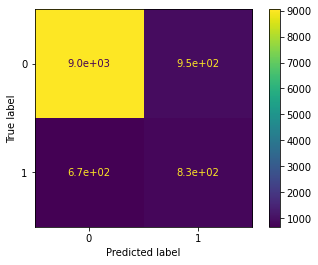

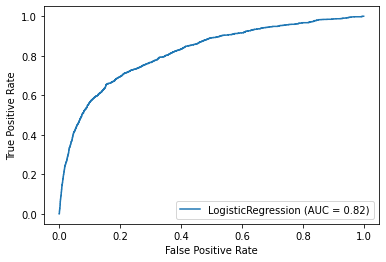

In [ ]:
#print(f"Training accuracy is {dropped_regressor.score(dropped_scaled, y_res)}")
print(f"Val set accuracy is {dropped_regressor.score(test_scaled, valclip_labels)}")

conf_matrix = confusion_matrix(y_true=valclip_labels, y_pred=yhat_dropped)

print("====="*30)
print("Other evaluation metrics for val dataset:")
print(conf_matrix)
plot_confusion_matrix(dropped_regressor, test_scaled, valclip_labels)
plot_roc_curve(dropped_regressor, test_scaled, valclip_labels)

print('Precision: %.3f' % precision_score(valclip_labels, yhat_dropped))
print('Recall: %.3f' % recall_score(valclip_labels, yhat_dropped))
print('F1 Score: %.3f' % f1_score(valclip_labels, yhat_dropped))

In [ ]:
#saving the prediction probablieties into an CSV file

probab_regressor = dropped_regressor.predict_proba(test_scaled)
df_probabs = pd.DataFrame(probab_regressor)
probab_1 = df_probabs[1].values
df_create['probabs'] = probab_1
df_create.to_csv('results1.csv')

##what other modeling methode can we try??

- Maybe SVC or randomforest classifiers???

- Implementing SVC

In [ ]:
from sklearn.svm import SVC

In [ ]:
#SVC model for hybrid sampling

svc = SVC(kernel='linear', C=2.0, random_state=42)
svc.fit(dropped_scaled, y_res)

svc_pred = svc.predict(test_scaled)

Val data accuracy is 0.8616521739130435
Other evaluation metrics for val dataset:
[[9097  903]
 [ 688  812]]
Precision: 0.473
Recall: 0.541
F1 Score: 0.505


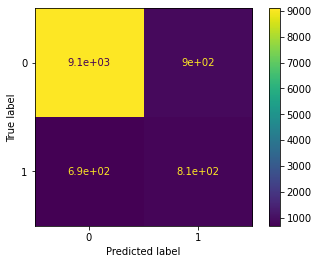

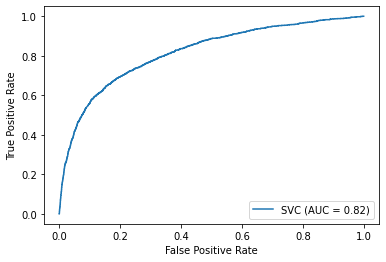

In [ ]:
#printing ROC and other evaluation metrics
print(f"Val data accuracy is {svc.score(test_scaled, valclip_labels)}")

conf_matrix = confusion_matrix(y_true=valclip_labels, y_pred=svc_pred)

print("====="*30)
print("Other evaluation metrics for val dataset:")
print(conf_matrix)
plot_confusion_matrix(svc, test_scaled, valclip_labels)
plot_roc_curve(svc, test_scaled, valclip_labels)

print('Precision: %.3f' % precision_score(valclip_labels, svc_pred))
print('Recall: %.3f' % recall_score(valclip_labels, svc_pred))
print('F1 Score: %.3f' % f1_score(valclip_labels, svc_pred))

In [ ]:
from xgboost import XGBClassifier


In [ ]:
data_val_numpy = x_test.to_numpy()

In [ ]:
modelxgb = XGBClassifier(random_state=42)
modelxgb.fit(X_res, y_res)

yhat_xgb = modelxgb.predict(data_val_numpy)

Testing accuracy is 0.8648695652173913
Testing data evaluation
[[9129  871]
 [ 683  817]]
Precision: 0.484
Recall: 0.545
F1 Score: 0.513


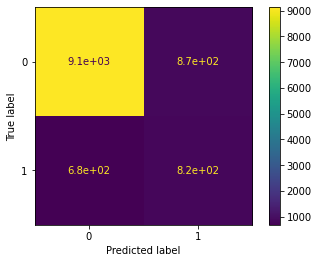

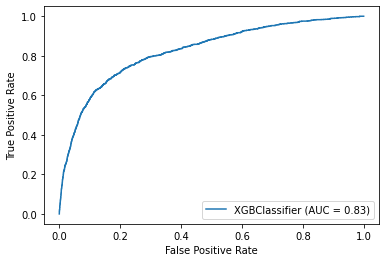

In [ ]:
print(f"Testing accuracy is {modelxgb.score(data_val_numpy, valclip_labels)}")

conf_matrix = confusion_matrix(y_true=valclip_labels, y_pred=yhat_xgb)

print("====="*30)
print("Testing data evaluation")
print(conf_matrix)
plot_confusion_matrix(modelxgb, data_val_numpy, valclip_labels)
plot_roc_curve(modelxgb, data_val_numpy, valclip_labels)

print('Precision: %.3f' % precision_score(valclip_labels, yhat_xgb))
print('Recall: %.3f' % recall_score(valclip_labels, yhat_xgb))
print('F1 Score: %.3f' % f1_score(valclip_labels, yhat_xgb))

In [ ]:
probab_svc = modelxgb.predict_proba(data_val_numpy)
df_probabs = pd.DataFrame(probab_svc)
probab_1 = df_probabs[1].values
df_create['probabs'] = probab_1
df_create.to_csv('results2.csv')

##Final summary

###Experiments:
- So I prepared the dataset after feature engineering, where we first removed the correlated features and then we removed the features based on p-value.

- I also tried forward and backward selection but it was computationally heavy and aslo the other feature selection pipeline gave better results.

After choosing the feature engineering pipeline for the dataset, I then checked the results if we keep the outliers and if we simply remove the outlkiers. Now, I looked at the samplng technique where I used 2 options.

1. We used the 50-50% ratio sampling
2. We used the hybrid sampling

-- Hybrid performed better.

After that, here are the models that gave the highest accuracies,

| Model  | Val set Accuracy  | AUC  | Sampling | Outliers
|:-:|:-:|:-:| :-: | :-: |
|  Logistic Regression | 0.86  | 0.82  | Hybrid | dropped
| SVC  |  0.87  |  0.82 | Hybrid | dropped
| XGBoost | 0.86 | 0.83 | Hybrid | dropped

###Key Points:

- I experimented several models with the given hybrid sampling and feature engineering pipline like XGBoost, KNN, Random Forests but his one performed the best.

- Since here the variable tare not explainable, I used PCA and then logistic regression as well. But it also did not improve the accuracy.

- In this dataset, since the features does not have any names. It was haarder to do the feature selection since we did not know the business importance of the dataset and we purely relied on statistical tests to determine the importance.

- If we did have the feature names, we could have used our domain knowledge to decide if the given feature is required or not.

- Also, if the aim is defined we could have perhaps chosen the different model to see the precision recall for our purpose.

- The logistic regression and the SVC performed the best since they try to make the dataset somewhat linearly separable. Again the precison and recall for both technique are different so selecting the final model would also depend on our problem statement.


We could have tried knn imputations that we talked about earlier. We could alse address the skewed distribuition to first transform it normal distribuition using log transforms.

We also have not removed the outliers from the val dataset since we did not want to leak any data and wanted to predict on the whole val data. But we could remove outliers to again get better accuracies

